In [1]:
!pip install ultralytics==8.3.50


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 28.2 MB/s eta 0:00:00


In [2]:
!pip install git+https://github.com/ultralytics/ultralytics.git


  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-cemku8ft
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-cemku8ft
  Resolved https://github.com/ultralytics/ultralytics.git to commit c7c7c139dc5585cd2fd3e110d7010cc74b0c0589
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ultralytics: filename=ultralytics-8.3.185-py3-none-any.whl size=1051686 sha256=e631356e808bc994875be8490640cb76a52c1433e33ccd1d3468b1d9a76d906a
  Stored in directory: /tmp/pip-ephem-wheel-cache-t_c4fai7/wheels/07/0b/e8/a9b200841fd9259dec61e092d35594d5de8f3412e26e53cb4d
Successfully built ultralytics
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.3.50
    Uninstalling ultralytics-8.3.50:
      Successfully uninstalled ultralytics-8.3.50


In [3]:
!pip install grad-cam


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.5-py3-none-any.whl size=44284 sha256=f426b05f7e75d7269c4ac32d535d2889b49c6d49db0e06aabb08bd7b27e381b8
  Stored in directory: /root/.cache/pip/wheels/fb/3b/09/2afc520f3d69bc26ae6bd87416759c820a3f7d05c1a077bbf6
Successfully built grad-cam


In [4]:
!pip install git+https://github.com/ultralytics/ultralytics.git grad-cam opencv-python matplotlib



  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-iyag_aam
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-iyag_aam
  Resolved https://github.com/ultralytics/ultralytics.git to commit c7c7c139dc5585cd2fd3e110d7010cc74b0c0589
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [5]:
from ultralytics import YOLO
from pytorch_grad_cam import EigenCAM


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
!pip install -U gdown
!gdown --folder "16jBWo5uD90GmJIc0Vx5agqrsUpAVg_PI" -O /content/data

Retrieving folder contents
Processing file 1hS9wN6NTHJX9BYPkhPy5N03SYEnGphVt APE.jpg
Processing file 1JWPBof6UbtVwK3nhto-OwCDWxZZvs5xx APE1.jpg
Processing file 12QDsJOw9Vs9_ZUmHANJqQ3cIGTifFRxQ BPE.jpg
Processing file 1mcOrc63MYt6Bdv7cjO9kUr9IMV1UED-q NE.jpg
Processing file 12POe8jATf5ZGhIkPX2bHjKvacywWVjJ_ VPE.jpg
Processing file 15pTIOhWvdUaF9q5IJs2bGSFcAivvTso9 YOLO_OcuLite.pt
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hS9wN6NTHJX9BYPkhPy5N03SYEnGphVt
To: /content/data/APE.jpg
100% 56.5k/56.5k [00:00<00:00, 3.76MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JWPBof6UbtVwK3nhto-OwCDWxZZvs5xx
To: /content/data/APE1.jpg
100% 55.6k/55.6k [00:00<00:00, 2.64MB/s]
Downloading...
From: https://drive.google.com/uc?id=12QDsJOw9Vs9_ZUmHANJqQ3cIGTifFRxQ
To: /content/data/BPE.jpg
100% 37.5k/37.5k [00:00<00:00, 10.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=

[LOAD] Weights: /content/data/YOLO_OcuLite.pt
[INFER] 3 image(s) on cuda


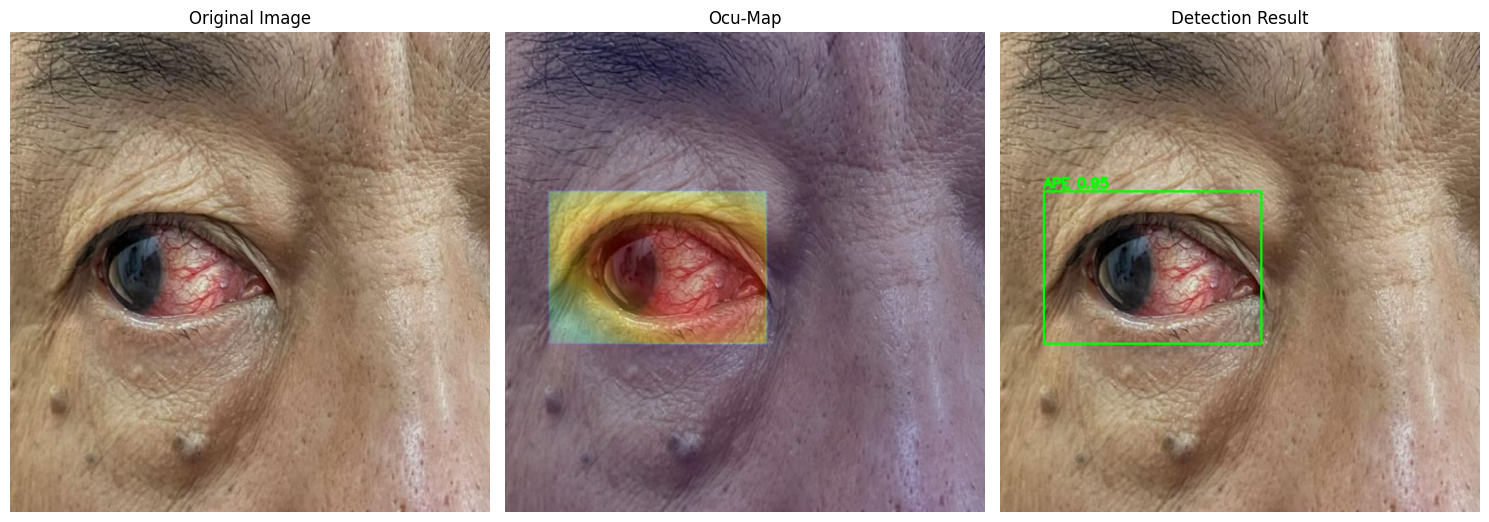

[OK] APE.jpg → runs/oculite_triptych/triptych/APE_triptych.jpg


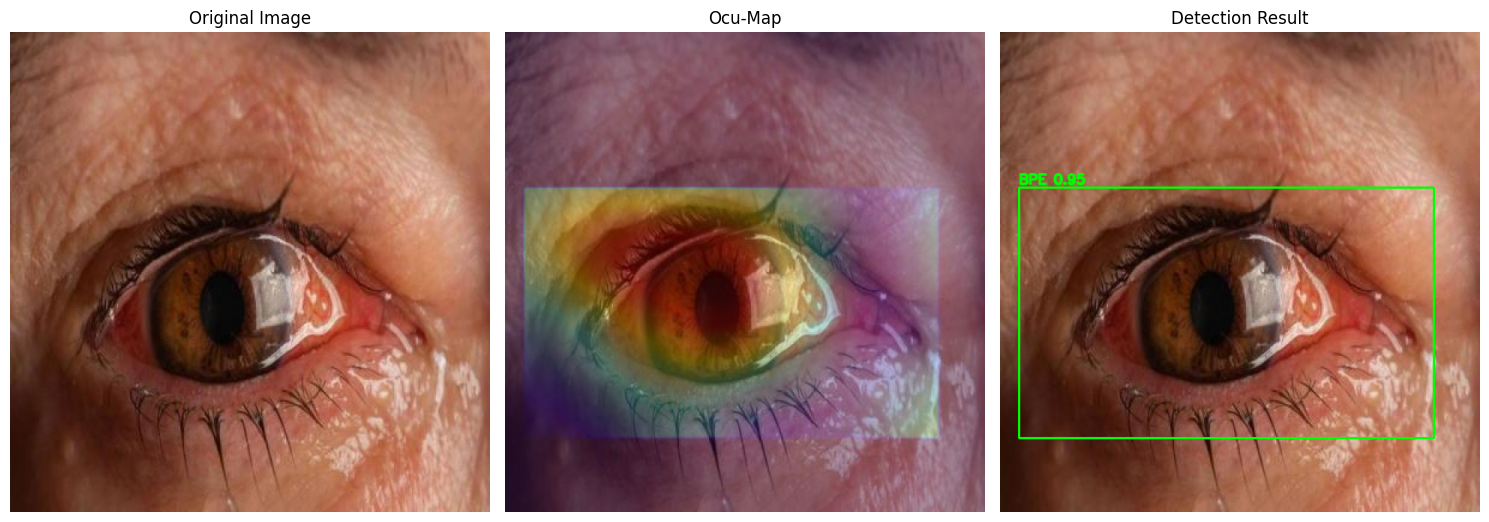

[OK] BPE.jpg → runs/oculite_triptych/triptych/BPE_triptych.jpg


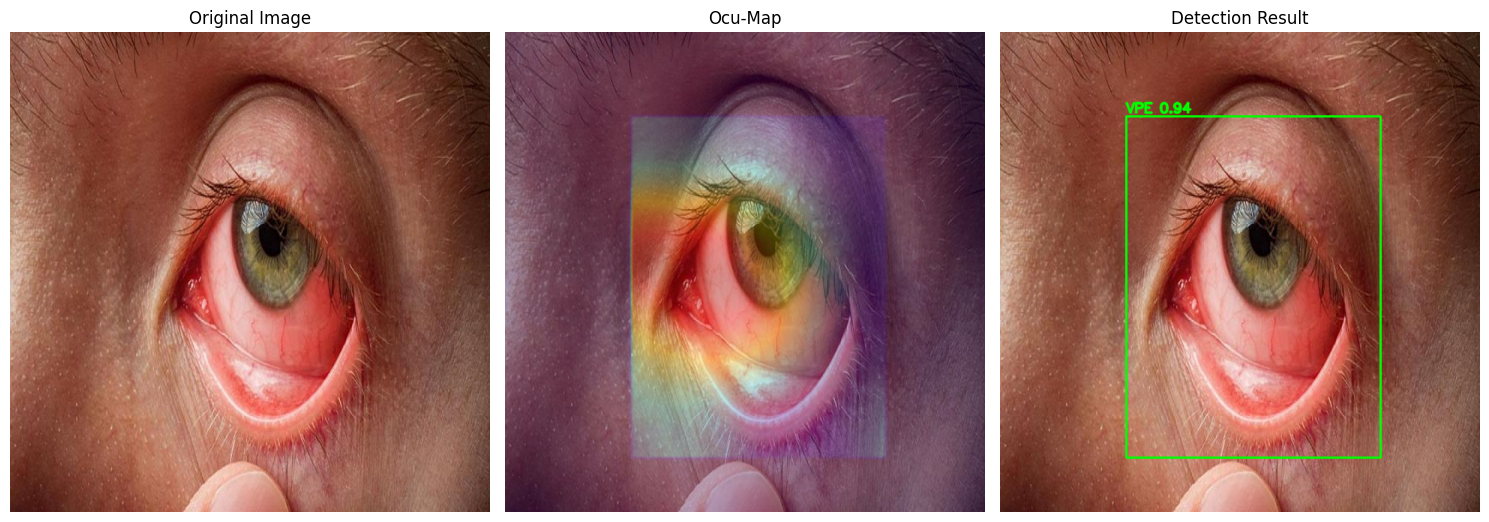

[OK] VPE.jpg → runs/oculite_triptych/triptych/VPE_triptych.jpg

All done.
- Triptych: runs/oculite_triptych/triptych
- OcuMap: runs/oculite_triptych/cams
- Detections: runs/oculite_triptych/detections


In [13]:
import os
from pathlib import Path
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# =======================
# CONFIG
# =======================
WEIGHTS = "/content/data/YOLO_OcuLite.pt"
EXAMPLE_IMAGES = [
    "/content/data/APE.jpg",
    "/content/data/BPE.jpg",
    "/content/data/VPE.jpg",
]
OUT_DIR = "runs/oculite_triptych"
CONF_THRESH = 0.74
IOU_THRESH  = 0.45
IMGSZ       = 640
SHOW        = True     # show figures inline

# =======================
# HELPERS
# =======================
def ensure_dir(p: str) -> str:
    Path(p).mkdir(parents=True, exist_ok=True); return p

def load_bgr(path: str):
    im = cv2.imread(path)
    if im is None: raise FileNotFoundError(f"Could not read image: {path}")
    return im

def pick_semantic_layer_before_detect(model: YOLO):
    seq = list(model.model.model)
    det_idx = None
    for i, m in enumerate(seq):
        if m.__class__.__name__.lower() in ("detect","pose","obb","segment"):
            det_idx = i; break
    if det_idx is None:
        for idx in reversed(range(len(seq))):
            n = seq[idx].__class__.__name__.lower()
            if "c2f" in n or "conv" in n: return seq[idx]
        return seq[-2] if len(seq)>1 else seq[-1]
    for idx in range(det_idx-1, -1, -1):
        n = seq[idx].__class__.__name__.lower()
        if "c2f" in n or "conv" in n: return seq[idx]
    return seq[det_idx-1]

def draw_detections(im_bgr, boxes_xyxy, confs, clss, names_map):
    im = im_bgr.copy()
    for i in range(len(boxes_xyxy)):
        if confs[i] < CONF_THRESH: continue
        x1,y1,x2,y2 = map(int, boxes_xyxy[i])
        label = f"{names_map.get(int(clss[i]), str(int(clss[i])))} {confs[i]:.2f}"
        cv2.rectangle(im, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(im, label, (x1, max(0,y1-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)
    return im

def relu_mean_heatmap(act: torch.Tensor, out_wh, blur_ks=7, clip_p=(5,95)):
    if act.is_cuda: act = act.detach().cpu()
    act = torch.nn.functional.relu(act)
    heat = act.mean(dim=0).numpy()
    lo, hi = np.percentile(heat, clip_p)
    heat = np.clip(heat, lo, hi); heat = (heat - lo) / (hi - lo + 1e-8)
    if blur_ks and blur_ks >= 3:
        k = blur_ks if blur_ks % 2 else blur_ks+1
        heat = cv2.GaussianBlur(heat, (k,k), 0)
    W,H = out_wh
    heat = cv2.resize(heat, (W,H), interpolation=cv2.INTER_CUBIC)
    m0,m1 = heat.min(), heat.max()
    return (heat - m0) / (m1 - m0 + 1e-8)

def sharp_box_mask(H, W, x1, y1, x2, y2, feather=0.03):
    mask = np.zeros((H,W), dtype=np.float32)
    x1,y1 = max(0,int(x1)), max(0,int(y1))
    x2,y2 = min(W-1,int(x2)), min(H-1,int(y2))
    if x2<=x1 or y2<=y1: return mask
    mask[y1:y2+1, x1:x2+1] = 1.0
    fw = max(3, int(feather * min(x2-x1+1, y2-y1+1)))
    if fw % 2 == 0: fw += 1
    mask = cv2.GaussianBlur(mask, (fw,fw), 0)
    m0,m1 = mask.min(), mask.max()
    return (mask - m0) / (m1 - m0 + 1e-8)

def apply_heat_on_rgb(im_rgb_float, heat_01):
    # lighter overlay: 25% heat, 75% image
    heat_color = cv2.applyColorMap((heat_01 * 255).astype(np.uint8), cv2.COLORMAP_JET)
    heat_color = cv2.cvtColor(heat_color, cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
    overlay = (0.25 * heat_color + 0.75 * im_rgb_float).clip(0, 1)
    return (overlay * 255).astype(np.uint8)

def save_triptych(original_bgr, OcuMap_rgb, detections_bgr, out_path,
                  titles=("Original Image","Ocu-Map","Detection Result"), show=False):
    orig_rgb = cv2.cvtColor(original_bgr, cv2.COLOR_BGR2RGB)
    det_rgb  = cv2.cvtColor(detections_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15,6))
    ax1=plt.subplot(1,3,1); ax1.imshow(orig_rgb);  ax1.set_title(titles[0]); ax1.axis("off")
    ax2=plt.subplot(1,3,2); ax2.imshow(OcuMap_rgb); ax2.set_title(titles[1]); ax2.axis("off")
    ax3=plt.subplot(1,3,3); ax3.imshow(det_rgb);   ax3.set_title(titles[2]); ax3.axis("off")
    plt.tight_layout(); plt.savefig(out_path, dpi=200, bbox_inches="tight")
    if show: plt.show()
    plt.close()

# =======================
# MAIN
# =======================
def main():
    ensure_dir(OUT_DIR)
    trip_dir = ensure_dir(os.path.join(OUT_DIR, "triptych"))
    boxes_dir= ensure_dir(os.path.join(OUT_DIR, "detections"))
    cams_dir = ensure_dir(os.path.join(OUT_DIR, "cams"))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"[LOAD] Weights: {WEIGHTS}")
    model = YOLO(WEIGHTS)

    names = model.names
    if isinstance(names, list): names = {i:n for i,n in enumerate(names)}

    # hook semantic layer right before Detect
    target_layer = pick_semantic_layer_before_detect(model)
    cached_act = {}
    def hook_fn(module, inp, out): cached_act["feat"] = out.detach()
    hook_handle = target_layer.register_forward_hook(hook_fn)

    print(f"[INFER] {len(EXAMPLE_IMAGES)} image(s) on {device}")
    results = model.predict(source=EXAMPLE_IMAGES, imgsz=IMGSZ,
                            conf=CONF_THRESH, iou=IOU_THRESH,
                            save=False, verbose=False,
                            device=0 if device.type=="cuda" else "cpu")

    for res in results:
        path = res.path; stem = Path(path).stem
        im_bgr = load_bgr(path); H0,W0 = im_bgr.shape[:2]
        im_rgb_float = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB).astype(np.float32)/255.0

        # base heatmap from activation
        act = cached_act["feat"][0]   # (C,H,W)
        heat_base = relu_mean_heatmap(act, out_wh=(W0,H0), blur_ks=7, clip_p=(5,95))

        # strict in-box saliency only (outside = 0)
        heat_focused = np.zeros_like(heat_base)
        boxes = np.zeros((0,4)); confs = np.array([]); clss = np.array([])
        if res.boxes is not None and len(res.boxes) > 0:
            boxes = res.boxes.xyxy.cpu().numpy()
            confs = res.boxes.conf.cpu().numpy()
            clss  = res.boxes.cls.cpu().numpy().astype(int)

            for i,(x1,y1,x2,y2) in enumerate(boxes):
                if confs[i] < CONF_THRESH: continue
                mask = sharp_box_mask(H0, W0, x1, y1, x2, y2, feather=0.03)
                heat_box = heat_base * mask      # ← keep strictly inside box
                heat_focused = np.maximum(heat_focused, heat_box)

                # save per-box overlay
                sal_box = apply_heat_on_rgb(im_rgb_float, heat_box)
                cv2.imwrite(os.path.join(cams_dir, f"{stem}_box{i+1}_OcuMap.jpg"),
                            cv2.cvtColor(sal_box, cv2.COLOR_RGB2BGR))

        # overlay final focused heatmap
        saliency_rgb = apply_heat_on_rgb(im_rgb_float, heat_focused)
        cv2.imwrite(os.path.join(cams_dir, f"{stem}_OcuMap.jpg"),
                    cv2.cvtColor(saliency_rgb, cv2.COLOR_RGB2BGR))

        # detections image
        det_bgr = draw_detections(im_bgr, boxes, confs, clss, names)
        cv2.imwrite(os.path.join(boxes_dir, f"{stem}_boxes.jpg"), det_bgr)

        # triptych
        out_fig = os.path.join(trip_dir, f"{stem}_triptych.jpg")
        save_triptych(im_bgr, saliency_rgb, det_bgr, out_fig, show=SHOW)
        print(f"[OK] {Path(path).name} → {out_fig}")

    hook_handle.remove()
    print(f"\nAll done.\n- Triptych: {trip_dir}\n- OcuMap: {cams_dir}\n- Detections: {boxes_dir}")

if __name__ == "__main__":
    main()
